# Numerical Operation - Filtering

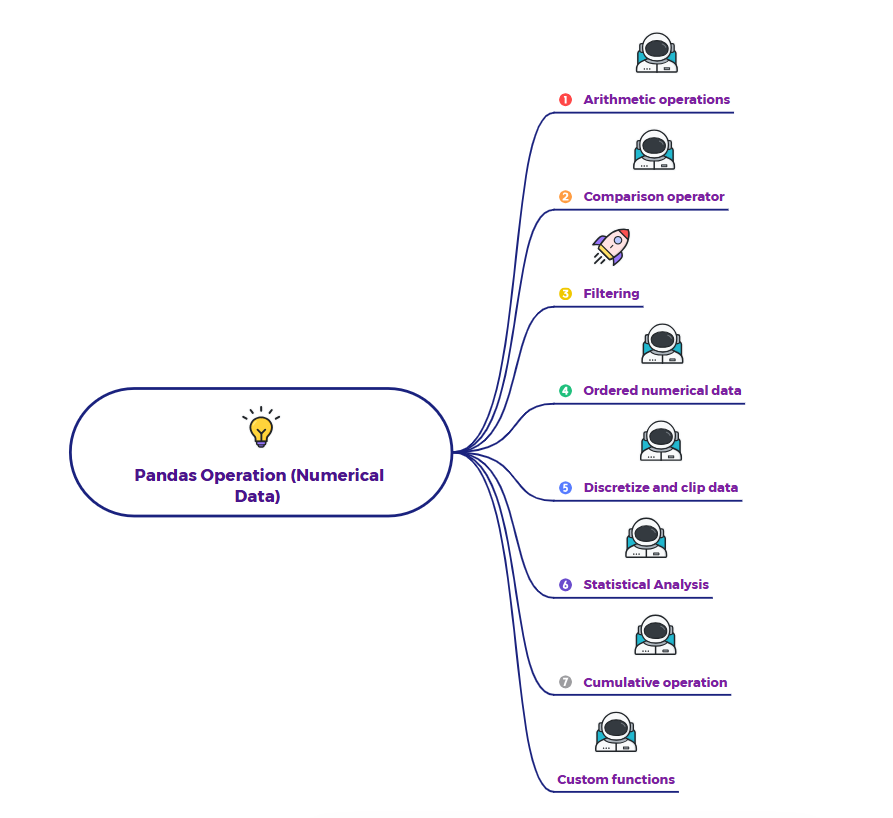

# Notebook Walkthrough -

* Import the required dataset and perform initial analysis
* Criteria Based Filtering
* Label based filtering
* Integer based filtering
* Condition based filtering - where
* Condition based filtering - mask


# 1. Import the required dataset and perform initial analysis

In [1]:
import pandas as pd
import numpy as np

movies = pd.read_csv('Movies.csv')
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


In [2]:
movies.shape

(3853, 28)

In [3]:
# View numerical columns of movies dataset

df1 = movies.select_dtypes(include='number')
df1.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000


# 2. Criteria Based Filtering

### A. Filtering out a specific column

In [4]:
df2 = df1['imdb_score']
print(type(df2))
df2.head()

<class 'pandas.core.series.Series'>


,imdb_score
0,7.9
1,7.1
2,6.8
3,8.5
4,6.6


### B. Filtering out by multiple column names

In [5]:
df2 = df1[['num_critic_for_reviews','num_voted_users' ,'budget', 'imdb_score' ]]
print(type(df2))
print(df1.shape)
print(df2.shape)
df2.head()

<class 'pandas.core.frame.DataFrame'>
(3853, 16)
(3853, 4)


,num_critic_for_reviews,num_voted_users,budget,imdb_score
0,723.0,886204,237000000.0,7.9
1,302.0,471220,300000000.0,7.1
2,602.0,275868,245000000.0,6.8
3,813.0,1144337,250000000.0,8.5
4,462.0,212204,263700000.0,6.6


In [6]:
df1.columns

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes'],
      dtype='object')

### C. Filtering out by criteria

In [7]:
# simple example

df2 = df1[df1['imdb_score'] >= 5]
df2.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000


In [8]:
# after filtering all imdb_score values in the new dataframe will be above 5

df2['imdb_score'].unique()

array([7.9, 7.1, 6.8, 8.5, 6.6, 6.2, 7.8, 7.5, 6.9, 6.1, 6.7, 7.3, 6.5,
       7.2, 8.1, 7. , 7.7, 8.2, 5.9, 6. , 5.7, 6.4, 6.3, 5.6, 8.3, 8. ,
       8.4, 5.8, 5.4, 9. , 5.2, 7.6, 5.5, 8.6, 8.8, 5.1, 7.4, 5. , 5.3,
       8.9, 8.7, 9.3, 9.2])

In [9]:
# Complex criteria

df2 = df1[(df1['num_critic_for_reviews'] >= 700) & (df1['director_facebook_likes'] <= 500)]
df2

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
14,733.0,143.0,0.0,748.0,15000.0,291021565.0,548573,20495,0.0,2536.0,225000000.0,2013.0,3000.0,7.2,2.35,118000
16,703.0,173.0,0.0,19000.0,26000.0,623279547.0,995415,87697,3.0,1722.0,220000000.0,2012.0,21000.0,8.1,1.85,123000
29,750.0,143.0,0.0,393.0,883.0,304360277.0,522030,2039,0.0,1498.0,200000000.0,2012.0,563.0,7.8,2.35,80000
217,775.0,124.0,0.0,641.0,13000.0,126464904.0,456260,24098,0.0,2326.0,130000000.0,2012.0,9000.0,7.0,2.35,97000
235,738.0,91.0,0.0,13.0,39.0,274084951.0,582917,87,0.0,1885.0,100000000.0,2013.0,23.0,7.8,2.35,147000
3038,750.0,143.0,0.0,393.0,883.0,304360277.0,522048,2039,0.0,1498.0,200000000.0,2012.0,563.0,7.8,2.35,80000


# 3. Label based filtering

* df.loc['row_label'] : Selects all columns for a single specific row by its label.
* df.loc[['row_label1', 'row_label2']] : Selects all columns for multiple specific rows by their labels.
* df.loc['start_row_label':'end_row_label'] : Selects all rows within a given label-based range (inclusive) and all columns.
* df.loc[boolean_series] : Selects rows where the corresponding value in a boolean Series (aligned by index) is True, for all columns.
* df.loc[:, 'column_label'] : Selects a single specific column for all rows by its label.
* df.loc[:, ['column_label1', 'column_label2']] : Selects multiple specific columns for all rows by their labels.
* df.loc[:, 'start_col_label':'end_col_label'] : Selects all columns within a given label-based range (inclusive) for all rows.
* df.loc['row_label', 'column_label'] : Selects a single scalar value at the intersection of a specific row and column label.
* df.loc[['row_label1', 'row_label2'], 'column_label'] : Selects a single specific column for multiple specific rows by their labels.
* df.loc[boolean_series, ['column_label1', 'column_label2']] : Selects specific columns for rows where the boolean Series condition is True.



In [181]:
df1.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000


In [10]:
# Selects the value at row label 2 and column label 'num_critic_for_reviews'
# Selects the value at row label 3 and column label 'duration'
# Selects the value at row label 4 and column label 'actor_3_facebook_likes'
# Selects the value at row label 1 and column label 'gross'
# Selects the value at row label 0 and column label 'num_voted_users'

print(df1.loc[2 , 'num_critic_for_reviews'])
print(df1.loc[3 , 'duration'])
print(df1.loc[4 , 'actor_3_facebook_likes'])
print(df1.loc[1 , 'gross'])
print(df1.loc[0 , 'num_voted_users'])

602.0
164.0
530.0
309404152.0
886204


In [11]:
# Selects rows with labels 1 through 4 (inclusive) and columns with labels 'num_critic_for_reviews' through 'actor_1_facebook_likes' (inclusive).

df1.loc[1:4, 'num_critic_for_reviews':'actor_1_facebook_likes']

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes
1,302.0,169.0,563.0,1000.0,40000.0
2,602.0,148.0,0.0,161.0,11000.0
3,813.0,164.0,22000.0,23000.0,27000.0
4,462.0,132.0,475.0,530.0,640.0


In [12]:
# Selects rows with labels 0 through 4 (inclusive) and columns with labels 'director_facebook_likes' through 'actor_1_facebook_likes' (inclusive).

df1.loc[0:4, 'director_facebook_likes':'actor_1_facebook_likes']

,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes
0,0.0,855.0,1000.0
1,563.0,1000.0,40000.0
2,0.0,161.0,11000.0
3,22000.0,23000.0,27000.0
4,475.0,530.0,640.0


In [13]:
# Selects the 'duration' column for rows where the 'num_critic_for_reviews' column is greater than 700.

df1.loc[df1['num_critic_for_reviews'] > 700 , 'duration']

,duration
0,178.0
3,164.0
14,143.0
16,173.0
29,143.0
93,169.0
124,120.0
217,124.0
235,91.0
283,165.0


In [14]:
df1

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3848,143.0,77.0,291.0,8.0,291.0,424760.0,72639,368,0.0,371.0,7000.0,2004.0,45.0,7.0,1.85,19000
3849,35.0,80.0,0.0,0.0,0.0,70071.0,589,0,0.0,35.0,7000.0,2005.0,0.0,6.3,NaN,74
3850,56.0,81.0,0.0,6.0,121.0,2040920.0,52055,147,0.0,130.0,7000.0,1992.0,20.0,6.9,1.37,0
3851,14.0,95.0,0.0,133.0,296.0,4584.0,1338,690,1.0,14.0,9000.0,2011.0,205.0,6.4,NaN,413


# 4. Integer based filtering

* df.iloc[row_index] : Selects all columns for a single specific row by its integer position.
* df.iloc[[row_index1, row_index2]] : Selects all columns for multiple specific rows by their integer positions.
* df.iloc[start_row_index:end_row_index] : Selects all rows within a given integer-based range (exclusive of the end) and all columns.
* df.iloc[:, column_index] : Selects a single specific column for all rows by its integer position.
* df.iloc[:, [column_index1, column_index2]] : Selects multiple specific columns for all rows by their integer positions.
* df.iloc[:, start_col_index:end_col_index] : Selects all columns within a given integer-based range (exclusive of the end) for all rows.
* df.iloc[row_index, column_index] : Selects a single scalar value at the intersection of a specific row and column integer position.
* df.iloc[[row_index1, row_index2], column_index] : Selects a single specific column for multiple specific rows by their integer positions.
* df.iloc[[row_index1, row_index2], [column_index1, column_index2]] : Selects specific columns for multiple specific rows by their integer positions.

In [22]:
# Filtering row 3

print(df1.iloc[2])

num_critic_for_reviews       6.020000e+02
duration                     1.480000e+02
director_facebook_likes      0.000000e+00
actor_3_facebook_likes       1.610000e+02
actor_1_facebook_likes       1.100000e+04
gross                        2.000742e+08
num_voted_users              2.758680e+05
cast_total_facebook_likes    1.170000e+04
facenumber_in_poster         1.000000e+00
num_user_for_reviews         9.940000e+02
budget                       2.450000e+08
title_year                   2.015000e+03
actor_2_facebook_likes       3.930000e+02
imdb_score                   6.800000e+00
aspect_ratio                 2.350000e+00
movie_facebook_likes         8.500000e+04
Name: 2, dtype: float64


In [25]:
# filtering row number 1 , 2 , 3 , 11 , in pandas row index starts from zero

df1.iloc[[0,1,2,10]]

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
10,434.0,169.0,0.0,903.0,18000.0,200069408.0,240396,29991,0.0,2367.0,209000000.0,2006.0,10000.0,6.1,2.35,0


In [26]:
# filtering rows in index position 1 to 5(excluded)

df1.iloc[1:5]

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000


In [28]:
# filtering all rows for the imdb_score column

df1.iloc[:,13]

,imdb_score
0,7.9
1,7.1
2,6.8
3,8.5
4,6.6
...,...
3848,7.0
3849,6.3
3850,6.9
3851,6.4


In [31]:
# filtering all rows for "director_facebook_likes" , "actor_1_facebook_likes" and "gross"

df1.iloc[: ,[2,4,5]]

,director_facebook_likes,actor_1_facebook_likes,gross
0,0.0,1000.0,760505847.0
1,563.0,40000.0,309404152.0
2,0.0,11000.0,200074175.0
3,22000.0,27000.0,448130642.0
4,475.0,640.0,73058679.0
...,...,...,...
3848,291.0,291.0,424760.0
3849,0.0,0.0,70071.0
3850,0.0,121.0,2040920.0
3851,0.0,296.0,4584.0


In [34]:
# filtering out all rows for columns 2 to 6 (excluded)

df1.iloc[: , 2:6]

,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross
0,0.0,855.0,1000.0,760505847.0
1,563.0,1000.0,40000.0,309404152.0
2,0.0,161.0,11000.0,200074175.0
3,22000.0,23000.0,27000.0,448130642.0
4,475.0,530.0,640.0,73058679.0
...,...,...,...,...
3848,291.0,8.0,291.0,424760.0
3849,0.0,0.0,0.0,70071.0
3850,0.0,6.0,121.0,2040920.0
3851,0.0,133.0,296.0,4584.0


In [37]:
# positional value for index 2 and column - actor_3_facebook_likes

df1.iloc[2,3]

np.float64(161.0)

In [42]:
# Filter out rows (0,2,3) for the column (actor_1_facebook_likes) at location 4


df1.iloc[[0,2,3],4]

,actor_1_facebook_likes
0,1000.0
2,11000.0
3,27000.0


In [44]:
# Filter out rows (0,2,3) for the columns at location 2,3,4

df1.iloc[[0,2,5] ,[2,3,4]]

,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes
0,0.0,855.0,1000.0
2,0.0,161.0,11000.0
5,0.0,4000.0,24000.0


# 5. Condition based filtering - where

df.where() in Pandas is used for conditional filtering where you want to selectively replace values in a DataFrame based on a condition, while preserving the DataFrame's original shape. It evaluates a boolean condition element-wise and retains the original value where the condition is True, and replaces it with a specified value (defaulting to NaN) where the condition is False.

* df.where(cond) : Replaces values in the DataFrame with NaN where the cond (boolean DataFrame/Series) is False, otherwise keeps the original values.
* df.where(cond, other) : Replaces values in the DataFrame with corresponding values from other where the cond is False, otherwise keeps the original values.
* df.where(cond, inplace=True) : Performs the where operation directly on the DataFrame, modifying it in place without returning a new DataFrame.

### A. df.where(cond) : Replaces values in the DataFrame with NaN where the cond (boolean DataFrame/Series) is False, otherwise keeps the original values.

In [47]:
df2 = df1.head(5)
df2

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000


In [49]:
# Checks for if values in any location of df2 is less than 700 , if yes retains the value else relaces with NaN
m = df2 < 700

df2.where(cond=m)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,NaN,178.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,7.9,1.78,NaN
1,302.0,169.0,563.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,7.1,2.35,0.0
2,602.0,148.0,0.0,161.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,393.0,6.8,2.35,NaN
3,NaN,164.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,8.5,2.35,NaN
4,462.0,132.0,475.0,530.0,640.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,632.0,6.6,2.35,NaN


### B. df.where(cond, other) : Replaces values in the DataFrame with corresponding values from other where the cond is False, otherwise keeps the original values.

In [50]:
df2 = df1.head(5)
df2

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000


In [52]:
# Checks for if values in any location of df2 is less than 700 , if yes retains the value else relaces with 0
m = df2 < 700

df2.where(cond=m , other=0)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0.0,178.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,7.9,1.78,0
1,302.0,169.0,563.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,0.0,0.0,0,0,1.0,0.0,0.0,0.0,393.0,6.8,2.35,0
3,0.0,164.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,8.5,2.35,0
4,462.0,132.0,475.0,530.0,640.0,0.0,0,0,1.0,0.0,0.0,0.0,632.0,6.6,2.35,0


### C. df.where(cond, inplace=True) : Performs the where operation directly on the DataFrame, modifying it in place without returning a new DataFrame.

In [53]:
df2 = df1.head(5)
df2

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000


In [56]:
# Checks for if values in any location of df2 is less than 700 , if yes retains the value else relaces with NaN inplace
m = df2 < 700

df2.where(cond=m , inplace=True)
df2

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,NaN,178.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,7.9,1.78,NaN
1,302.0,169.0,563.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,7.1,2.35,0.0
2,602.0,148.0,0.0,161.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,393.0,6.8,2.35,NaN
3,NaN,164.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,8.5,2.35,NaN
4,462.0,132.0,475.0,530.0,640.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,632.0,6.6,2.35,NaN


# 6. Condition based filtering - mask

df.mask() in Pandas is a method for conditional filtering that is essentially the inverse of df.where(). It replaces values in a DataFrame based on a boolean condition: where the condition is True, values are replaced (defaulting to NaN), and where the condition is False, the original values are kept. Think of it as "masking out" (hiding or replacing) the data points that do meet a specified criterion.

* df.mask(cond) : Replaces values in the DataFrame with NaN where the cond (boolean DataFrame/Series) is True, otherwise keeps the original values.
* df.mask(cond, other) : Replaces values in the DataFrame with corresponding values from other where the cond is True, otherwise keeps the original values.
* df.mask(cond, inplace=True) : Performs the mask operation directly on the DataFrame, modifying it in place without returning a new DataFrame.
* df.mask(cond, axis='columns') (or axis='index') : Applies the condition along a specific axis, broadcasting the cond to match the DataFrame's dimensions for replacement.

### A. df.mask(cond) : Replaces values in the DataFrame with NaN where the cond (boolean DataFrame/Series) is True, otherwise keeps the original values.

In [60]:
df1 = movies.select_dtypes(include='number')
df1.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000


In [61]:
df2 = df1.head(5)
df2

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000


In [62]:
# Checks for if values in any location of df2 is less than 700 , if yes relaces with NaN  else retains the value
m = df2 < 700

df2.mask(cond=m)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,NaN,NaN,855.0,1000.0,760505847.0,886204,4834,NaN,3054.0,237000000.0,2009.0,936.0,NaN,NaN,33000.0
1,NaN,NaN,NaN,1000.0,40000.0,309404152.0,471220,48350,NaN,1238.0,300000000.0,2007.0,5000.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,11000.0,200074175.0,275868,11700,NaN,994.0,245000000.0,2015.0,NaN,NaN,NaN,85000.0
3,813.0,NaN,22000.0,23000.0,27000.0,448130642.0,1144337,106759,NaN,2701.0,250000000.0,2012.0,23000.0,NaN,NaN,164000.0
4,NaN,NaN,NaN,NaN,NaN,73058679.0,212204,1873,NaN,738.0,263700000.0,2012.0,NaN,NaN,NaN,24000.0


### B. df.mask(cond, other) : Replaces values in the DataFrame with corresponding values from other where the cond is True, otherwise keeps the original values.

In [64]:
df2 = df1.head(5)
df2

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000


In [65]:
# Checks for if values in any location of df2 is less than 700 , if yes relaces with 0  else retains the value
m = df2 < 700

df2.mask(cond=m , other=0)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,0.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,0.0,0.0,33000
1,0.0,0.0,0.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,11000.0,200074175.0,275868,11700,0.0,994.0,245000000.0,2015.0,0.0,0.0,0.0,85000
3,813.0,0.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,0.0,0.0,164000
4,0.0,0.0,0.0,0.0,0.0,73058679.0,212204,1873,0.0,738.0,263700000.0,2012.0,0.0,0.0,0.0,24000


### C. df.mask(cond, inplace=True) : Performs the mask operation directly on the DataFrame, modifying it in place without returning a new DataFrame.

In [67]:
df2 = df1.head(5)
df2

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000


In [68]:
# Checks for if values in any location of df2 is less than 700 , if yes relaces with NaN inplace  else retains the value
m = df2 < 700

df2.mask(cond=m , inplace=True)
df2

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,NaN,NaN,855.0,1000.0,760505847.0,886204,4834,NaN,3054.0,237000000.0,2009.0,936.0,NaN,NaN,33000.0
1,NaN,NaN,NaN,1000.0,40000.0,309404152.0,471220,48350,NaN,1238.0,300000000.0,2007.0,5000.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,11000.0,200074175.0,275868,11700,NaN,994.0,245000000.0,2015.0,NaN,NaN,NaN,85000.0
3,813.0,NaN,22000.0,23000.0,27000.0,448130642.0,1144337,106759,NaN,2701.0,250000000.0,2012.0,23000.0,NaN,NaN,164000.0
4,NaN,NaN,NaN,NaN,NaN,73058679.0,212204,1873,NaN,738.0,263700000.0,2012.0,NaN,NaN,NaN,24000.0


# COMPLETED